# 神经网络
- 感知机中的w向量叫做权重参数，代表了各个输入的重要程度
- 感知机中的b向量叫做偏置，代表了神经元被激活的容易程度
- 感知机要作为一个神经元，还要给自己加上一个激活函数，常见的激活函数有simoid函数、阶跃函数、tanh函数、relu函数等

## 常见的激活函数

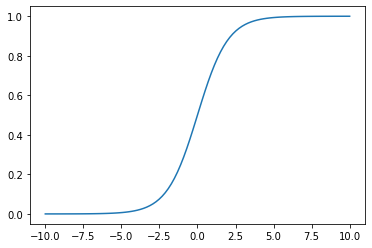

In [1]:
# sigmoid函数
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# 画出sigmoid函数的曲线
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

/tmp/ipykernel_10166/2102518773.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


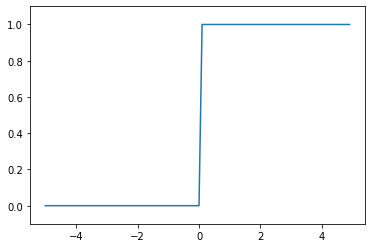

In [2]:
# 阶跃函数
def step_function(x):
    return np.array(x > 0, dtype=np.int)
# 画出阶跃函数的曲线
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
# 制定y轴的范围，为了图形美观   
plt.ylim(-0.1, 1.1)
plt.show()

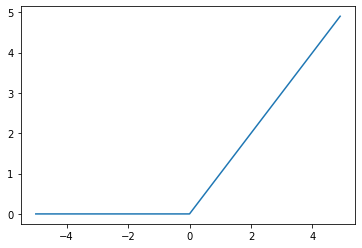

In [3]:
# ReLU函数
def relu(x):
    return np.maximum(0, x)
# 画出ReLU函数的曲线
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 多维数组的运算

In [4]:
# 一维数组的运算
x = np.arange(1, 6)
y = np.arange(7, 12)
print(x)
print(y)
# 查看维度信息
print(x.ndim)
print(y.ndim)
# 查看数组的形状
print(x.shape)
print(y.shape)
# 查看连个数组相加后的结果
print(x+y)

[1 2 3 4 5]
[ 7  8  9 10 11]
1
1
(5,)
(5,)
[ 8 10 12 14 16]


In [5]:
# 矩阵的运算，和向量类似，只是注意一下点积
x = np.arange(1, 7).reshape(2, 3)
y = np.arange(7, 13).reshape(2, 3)
z = np.arange(13, 19).reshape(3, 2)
print(x)
print(y)
print(z)
print(x.ndim)
print(y.ndim)
print(z.ndim)
print(x.shape)
print(y.shape)
print(z.shape)
print(x + y)
# 矩阵算术运算时要求两个矩阵的形状要一直
print(x+y)
# print(y+z)
# 点积时，要求前面矩阵的第二个维度后后面矩阵的第一个维度相同
# print(x.dot(y))
print(y.dot(z))

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
[[13 14]
 [15 16]
 [17 18]]
2
2
2
(2, 3)
(2, 3)
(3, 2)
[[ 8 10 12]
 [14 16 18]]
[[ 8 10 12]
 [14 16 18]]
[[364 388]
 [499 532]]


## 神经网络的实现
- 每层神经网络的计算过程，可以用公式表达为：$A = X \times W + B$

## 展现3层神经网络的计算过程

In [6]:
# 第一层神经网络的计算过程
X = np.array([1.0, 0.5])
print(X)
print(X.shape)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
print(A1)
print(A1.shape)
Z1 = sigmoid(A1)
print(Z1)
# 第二层神经网络的计算过程
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
print(A2)
print(A2.shape)
Z2 = sigmoid(A2)
print(Z2)
# 第三层神经网络的计算过程
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
print(A3)
print(A3.shape)

[1.  0.5]
(2,)
[0.3 0.7 1.1]
(3,)
[0.57444252 0.66818777 0.75026011]
[0.51615984 1.21402696]
(2,)
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]
(2,)


## 使用神经网络语言实现上面的过程

In [7]:
# 初始化神经网络
def init_network():
    # 初始化一个字典用来存放权重参数和偏置参数
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
# 定义前项传播过程
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    A1 = np.dot(x, W1) + b1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + b2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + b3
    return A3
# 测试上面的运算结果
network = init_network()
X = np.array([1.0, 0.5])
print(forward(network, X))

[0.31682708 0.69627909]


## 输出层的设计
- 在上面的那个3层神经网络中，最后的输出由两个神经元直接输出，没有做任何转换
- 这里介绍softmax输出，将多个输出最后映射成概率分布
- softmax回归可以用公式表达：$y = \frac{e^{a_1}}{\sum_{i=1}^{n}e^{a_i}}$
- 为什么不直接用sum(x)，是因为exp(x)表达出来了输出的相对位置，就是说给数组中的这些数字加上或者减去一个常数，最后的计算结果不会变化。比如看softmax是如何对付溢出这个问题的

In [2]:
# 演示softmax的一个例子
import numpy as np
X = np.arange(1, 6)
print(X)
exp_X = np.exp(X)
print(exp_X)
print(sum(exp_X))
print(exp_X/sum(exp_X))

[1 2 3 4 5]
[  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
233.2041839862982
[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


In [3]:
# 定义softmax函数
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / sum(exp_x)

In [4]:
# 使用softmax位置相对性验证
x = np.arange(1, 4)
y = x+3
print(softmax(x))
print(softmax(y))

# 溢出问题验证
x_overflow = np.arange(901, 904)
print(x_overflow)
print(softmax(x_overflow))

# 使用平移不变形，解决溢出问题
x_shift = x_overflow - np.max(x_overflow)
print(x_shift)
print(softmax(x_shift))

[0.09003057 0.24472847 0.66524096]
[0.09003057 0.24472847 0.66524096]
[901 902 903]
[nan nan nan]
[-2 -1  0]
[0.09003057 0.24472847 0.66524096]


/tmp/ipykernel_4350/3560810081.py:3: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
/tmp/ipykernel_4350/3560810081.py:4: RuntimeWarning: invalid value encountered in true_divide
  return exp_x / sum(exp_x)


In [11]:
# 在上面的3层神经网络中，最后的输出结果给一个softmax函数
# 最后的输出之和为1，就可以解释为概率了
# 如果在训练神经网络是，训练数据集的正样本都跑到了上面的神经元，负样本都跑到了下面的神经元，
# 那么这个最后的结果就可以解释为新的这个样本为正样本的概率是0.4，负样本的概率是0.6
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)
print(softmax(y))

[0.31682708 0.69627909]
[0.40625907 0.59374093]


# 手写数字识别
- 使用MINIS数据集实现深度神经网络上的HelloWorld

In [17]:
# 加载mnist数据集
# 这里和书里不一样，书里是把数据集先下载下来的
# 可能是不想用keras这个包，和自己提前说的只用numpy和matplotlib
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


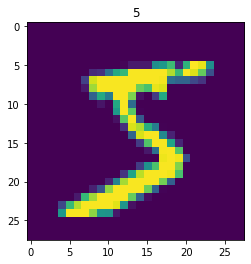

In [22]:
import matplotlib.pyplot as plt
# 查看mnist的第一个样本和标签
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

In [23]:
# 这里暂时不使用CNN，所以先将图像数据拉平，暂时不需要空间信息
X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [36]:
import pickle
# 获取数据
def get_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # 先将数据拉平，不适用CNN那一套，暂时不需要空间信息
    X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
    X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32)
    X_train /= 255
    X_test /= 255
    # 作者已经把模型训练给好了，所以这里只返回测试数据集
    return X_test, y_test
def init_network():
    with open('./sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    A1 = np.dot(x, W1) + b1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + b2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + b3
    y = softmax(A3)
    return y

In [42]:
# 再单独看一下network的结构
network = init_network()
# type(network)
# print(network.values())
print(network['W1'].shape)
print(network['b1'].shape)
print(network['W2'].shape)
print(network['b2'].shape)
print(network['W3'].shape)
print(network['b3'].shape)
# 作者专门做了一个三层的神经网络``
print(network.keys())

(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])


In [41]:
# 开始秀了
# 分别先拿到特征空间和标签空间
x, t = get_data()
print(x)
print(x.shape)
print(t.shape)
network = init_network()
# 初始化准确率
accuracy_cnt = 0
for i in range(len(x)):
    # 用神经网络预测的值
    y = predict(network, x[i])
    # 概率最大的那个
    p = np.argmax(y)
    # 如果预测正确，+1
    if p == t[i]:
        accuracy_cnt += 1
# 也就是说作者给的模型的准确率是0.94
print(f'Accuracy: {accuracy_cnt / len(x)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 784)
(10000,)
Accuracy: 0.9352


## 批处理
- 在训练和测试神经网络时，把数据分割成一个个小的批次，每个批次里包含一定量的数据